In [1]:
import pandas as pd
from collections import defaultdict
import warnings
import visualize
import neat
import multiprocessing
import os
import matplotlib.pyplot as plt

import numpy as np

from sklearn.datasets import load_digits
digits = load_digits()

In [2]:
X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[:1617]
y = digits.target[:1617]

In [3]:
def softmax(x, axis=1):
    # 计算每行的最大值
    row_max = x.max(axis=axis)
 
    # 每行元素都需要减去对应的最大值，否则求exp(x)会溢出，导致inf情况
    row_max=row_max.reshape(-1, 1)
    x = x - row_max
 
    # 计算e的指数次幂
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis=axis, keepdims=True)
    s = x_exp / x_sum
    return s

In [4]:
def get_winner(class1):
    
    numbers = [*range(10)] # number 2 > number 1
    number_of_classification = len(numbers)
    #number_of_sampling = 100

    list_y = y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

        
    class2 = []

    class1_indexes = []
    class2_indexes = []

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("number of class1:{}".format(len(class1_label)))
    print("number of class2:{}".format(len(class2_label)))

    samplesize = 1617
    x_inputs =[tuple(c) for c in X[class1_indexes].tolist()] + [tuple(c) for c in X[class2_indexes].tolist()]
    x_outputs = [tuple([c]) for c in class1_label + class2_label]
    
    
    def eval_genomes(genomes, config):
        for genome_id, genome in genomes:
            net = neat.nn.FeedForwardNetwork.create(genome, config)

            outputs = []
            for xi in x_inputs:
                output = net.activate(xi)
                outputs.append(output)


            px_outputs = softmax(np.array(outputs).reshape(samplesize, 2), axis=1)
            # the index of maximum in each line
            pred_outputs = np.argmax(px_outputs, axis = 1)
            real_outputs = np.array(x_outputs).reshape(samplesize,)

            acc = np.sum(pred_outputs == real_outputs)/samplesize

            genome.fitness = acc

    def run(config_file):
        # Load configuration.
        config = neat.Config(
            neat.DefaultGenome,
            neat.DefaultReproduction,
            neat.DefaultSpeciesSet,
            neat.DefaultStagnation,
            config_file,
        )

        # Create the population, which is the top-level object for a NEAT run.
        p = neat.Population(config)

        # add a stdout reporter to show progress in the terminal
        reporter = neat.StdOutReporter(False)
        p.add_reporter(reporter)
        stats = neat.StatisticsReporter()
        p.add_reporter(stats)
        #checkpointer = neat.Checkpointer(100)
        #p.add_reporter(checkpointer)
        # Run for up to 300 generations.
        winner = p.run(eval_genomes, 150)

        return [stats, winner]
    
    local_dir = os.getcwd()
    config_path = os.path.join(local_dir, "config-feedforward-mnist2")
    [stats, winner] = run(config_path)
    
    return winner

In [5]:
import numpy as np
import random

number_codes = []
for i in range(2**(10-1), 2**10-1):
    for j in bin(i).split('b')[1]:
        number_codes.append(int(j))
number_codes = np.array(number_codes).reshape(2**9 - 1,10).T     

slice = random.sample(range(511),10)

number_codes = number_codes[:,slice].tolist() 

In [6]:
classes = []
for i in range(10):
    code_list = np.array(number_codes).T[i]
    classes.append(np.where(code_list==1)[0].tolist())

In [19]:
matrix_errors = []

for i in range(9):
    for j in range(i+1,10):
        matrix_errors.append(10 - np.sum(np.array(number_codes[i]) == np.array(number_codes[j])))
np.min(matrix_errors)
        # print(number_codes[i], number_codes[j], 3 - np.sum(np.array(number_codes[i]) == np.array(number_codes[j])))
#np.mean(matrix_errors)  

3

In [8]:
winner_list = []

for class1 in classes:
    winner = get_winner(class1)
    winner_list.append(winner)

number of class1:650
number of class2:967

 ****** Running generation 0 ****** 

Population's average fitness: 0.51998 stdev: 0.08234
Best fitness: 0.69573 - size: (2, 13) - species 1 - id 110
Average adjusted fitness: 0.188
Mean genetic distance 2.926, standard deviation 0.513
Population of 199 members in 24 species
Total extinctions: 0
Generation time: 4.632 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56933 stdev: 0.07498
Best fitness: 0.69573 - size: (2, 13) - species 1 - id 110
Average adjusted fitness: 0.201
Mean genetic distance 2.981, standard deviation 0.476
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 4.989 sec (4.810 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57564 stdev: 0.07686
Best fitness: 0.69573 - size: (2, 13) - species 1 - id 110
Average adjusted fitness: 0.231
Mean genetic distance 3.028, standard deviation 0.487
Population of 203 members in 34 species
Total extinctio

Population's average fitness: 0.61598 stdev: 0.08602
Best fitness: 0.72789 - size: (9, 25) - species 31 - id 2489
Average adjusted fitness: 0.285
Mean genetic distance 3.222, standard deviation 0.512
Population of 196 members in 25 species
Total extinctions: 0
Generation time: 6.574 sec (6.254 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.61622 stdev: 0.08360
Best fitness: 0.72789 - size: (9, 25) - species 31 - id 2489
Average adjusted fitness: 0.243
Mean genetic distance 3.212, standard deviation 0.539
Population of 194 members in 24 species
Total extinctions: 0
Generation time: 6.582 sec (6.319 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.60878 stdev: 0.09059
Best fitness: 0.72789 - size: (9, 25) - species 31 - id 2489
Average adjusted fitness: 0.217
Mean genetic distance 3.184, standard deviation 0.530
Population of 196 members in 22 species
Total extinctions: 0
Generation time: 6.629 sec (6.383 average)

 ******

Population's average fitness: 0.61539 stdev: 0.09216
Best fitness: 0.75572 - size: (6, 21) - species 43 - id 6622
Average adjusted fitness: 0.216
Mean genetic distance 3.290, standard deviation 0.552
Population of 202 members in 20 species
Total extinctions: 0
Generation time: 8.643 sec (8.076 average)

 ****** Running generation 49 ****** 

Population's average fitness: 0.62136 stdev: 0.08901
Best fitness: 0.75572 - size: (6, 21) - species 43 - id 6622
Average adjusted fitness: 0.219
Mean genetic distance 3.287, standard deviation 0.535
Population of 195 members in 20 species
Total extinctions: 0
Generation time: 8.632 sec (8.194 average)

 ****** Running generation 50 ****** 

Population's average fitness: 0.61456 stdev: 0.09621
Best fitness: 0.75572 - size: (6, 21) - species 43 - id 6622
Average adjusted fitness: 0.271
Mean genetic distance 3.296, standard deviation 0.553
Population of 194 members in 20 species
Total extinctions: 0
Generation time: 8.379 sec (8.181 average)

 ******

Population's average fitness: 0.62689 stdev: 0.08715
Best fitness: 0.75696 - size: (15, 37) - species 50 - id 9879
Average adjusted fitness: 0.283
Mean genetic distance 3.124, standard deviation 0.607
Population of 195 members in 14 species
Total extinctions: 0
Generation time: 9.196 sec (9.192 average)

 ****** Running generation 73 ****** 

Population's average fitness: 0.62181 stdev: 0.09163
Best fitness: 0.75696 - size: (15, 37) - species 50 - id 9879
Average adjusted fitness: 0.264
Mean genetic distance 3.129, standard deviation 0.616
Population of 202 members in 14 species
Total extinctions: 0
Generation time: 9.283 sec (9.276 average)

 ****** Running generation 74 ****** 

Population's average fitness: 0.61695 stdev: 0.09038
Best fitness: 0.75696 - size: (15, 37) - species 50 - id 9879
Average adjusted fitness: 0.245
Mean genetic distance 3.139, standard deviation 0.617
Population of 200 members in 14 species
Total extinctions: 0
Generation time: 9.839 sec (9.398 average)

 ***

Population's average fitness: 0.62607 stdev: 0.09298
Best fitness: 0.80458 - size: (16, 40) - species 50 - id 14409
Average adjusted fitness: 0.241
Mean genetic distance 3.053, standard deviation 0.548
Population of 198 members in 17 species
Total extinctions: 0
Generation time: 9.752 sec (9.900 average)

 ****** Running generation 97 ****** 

Population's average fitness: 0.61812 stdev: 0.09960
Best fitness: 0.80458 - size: (16, 40) - species 50 - id 14409
Average adjusted fitness: 0.256
Mean genetic distance 3.024, standard deviation 0.543
Population of 196 members in 16 species
Total extinctions: 0
Generation time: 9.117 sec (9.821 average)

 ****** Running generation 98 ****** 

Population's average fitness: 0.62534 stdev: 0.09462
Best fitness: 0.80458 - size: (16, 40) - species 50 - id 14409
Average adjusted fitness: 0.273
Mean genetic distance 3.074, standard deviation 0.544
Population of 200 members in 16 species
Total extinctions: 0
Generation time: 9.197 sec (9.748 average)

 

Population's average fitness: 0.63320 stdev: 0.11026
Best fitness: 0.81509 - size: (21, 47) - species 78 - id 18764
Average adjusted fitness: 0.273
Mean genetic distance 3.127, standard deviation 0.548
Population of 198 members in 17 species
Total extinctions: 0
Generation time: 9.688 sec (9.883 average)

 ****** Running generation 121 ****** 

Population's average fitness: 0.64518 stdev: 0.11072
Best fitness: 0.81509 - size: (21, 47) - species 78 - id 18764
Average adjusted fitness: 0.369
Mean genetic distance 3.107, standard deviation 0.566
Population of 196 members in 17 species
Total extinctions: 0
Generation time: 9.905 sec (9.908 average)

 ****** Running generation 122 ****** 

Population's average fitness: 0.65124 stdev: 0.09819
Best fitness: 0.81509 - size: (21, 47) - species 78 - id 18764
Average adjusted fitness: 0.257
Mean genetic distance 3.124, standard deviation 0.597
Population of 203 members in 16 species
Total extinctions: 0
Generation time: 9.569 sec (9.921 average)


Population's average fitness: 0.65131 stdev: 0.09603
Best fitness: 0.82746 - size: (22, 52) - species 78 - id 22552
Average adjusted fitness: 0.245
Mean genetic distance 3.216, standard deviation 0.591
Population of 197 members in 17 species
Total extinctions: 0
Generation time: 10.471 sec (10.274 average)

 ****** Running generation 145 ****** 

Population's average fitness: 0.64431 stdev: 0.10787
Best fitness: 0.82746 - size: (22, 52) - species 78 - id 22552
Average adjusted fitness: 0.289
Mean genetic distance 3.241, standard deviation 0.599
Population of 196 members in 17 species
Total extinctions: 0
Generation time: 10.508 sec (10.233 average)

 ****** Running generation 146 ****** 

Population's average fitness: 0.65188 stdev: 0.09690
Best fitness: 0.82746 - size: (22, 52) - species 78 - id 22552
Average adjusted fitness: 0.294
Mean genetic distance 3.243, standard deviation 0.597
Population of 196 members in 17 species
Total extinctions: 0
Generation time: 10.350 sec (10.201 ave

Total extinctions: 0
Generation time: 6.330 sec (6.424 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.65156 stdev: 0.09238
Best fitness: 0.77737 - size: (4, 17) - species 2 - id 1509
Average adjusted fitness: 0.313
Mean genetic distance 3.214, standard deviation 0.490
Population of 196 members in 36 species
Total extinctions: 0
Generation time: 6.520 sec (6.431 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.64225 stdev: 0.09712
Best fitness: 0.77737 - size: (4, 17) - species 2 - id 1509
Average adjusted fitness: 0.272
Mean genetic distance 3.170, standard deviation 0.511
Population of 191 members in 34 species
Total extinctions: 0
Generation time: 6.476 sec (6.405 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.65546 stdev: 0.09467
Best fitness: 0.77737 - size: (4, 17) - species 2 - id 1509
Average adjusted fitness: 0.269
Mean genetic distance 3.146, standard deviation 0.514
Population 

Population of 199 members in 21 species
Total extinctions: 0
Generation time: 7.936 sec (7.514 average)

 ****** Running generation 43 ****** 

Population's average fitness: 0.65531 stdev: 0.11179
Best fitness: 0.82437 - size: (9, 27) - species 15 - id 5040
Average adjusted fitness: 0.373
Mean genetic distance 3.325, standard deviation 0.541
Population of 199 members in 21 species
Total extinctions: 0
Generation time: 7.996 sec (7.571 average)

 ****** Running generation 44 ****** 

Population's average fitness: 0.65100 stdev: 0.10945
Best fitness: 0.82437 - size: (9, 27) - species 15 - id 5040
Average adjusted fitness: 0.304
Mean genetic distance 3.346, standard deviation 0.539
Population of 199 members in 21 species
Total extinctions: 0
Generation time: 8.079 sec (7.660 average)

 ****** Running generation 45 ****** 

Population's average fitness: 0.64790 stdev: 0.11245
Best fitness: 0.82437 - size: (9, 27) - species 15 - id 5040
Average adjusted fitness: 0.331
Mean genetic distance 

Mean genetic distance 3.395, standard deviation 0.580
Population of 194 members in 19 species
Total extinctions: 0
Generation time: 8.325 sec (8.513 average)

 ****** Running generation 67 ****** 

Population's average fitness: 0.66139 stdev: 0.10884
Best fitness: 0.83426 - size: (11, 34) - species 15 - id 9452
Average adjusted fitness: 0.279
Mean genetic distance 3.380, standard deviation 0.608
Population of 194 members in 18 species
Total extinctions: 0
Generation time: 8.418 sec (8.532 average)

 ****** Running generation 68 ****** 

Population's average fitness: 0.66710 stdev: 0.10687
Best fitness: 0.83426 - size: (11, 34) - species 15 - id 9452
Average adjusted fitness: 0.294
Mean genetic distance 3.371, standard deviation 0.614
Population of 195 members in 18 species
Total extinctions: 0
Generation time: 8.288 sec (8.530 average)

 ****** Running generation 69 ****** 

Population's average fitness: 0.65780 stdev: 0.11104
Best fitness: 0.83426 - size: (11, 34) - species 15 - id 94

Mean genetic distance 3.369, standard deviation 0.609
Population of 196 members in 15 species
Total extinctions: 0
Generation time: 9.117 sec (9.161 average)

 ****** Running generation 91 ****** 

Population's average fitness: 0.66070 stdev: 0.11231
Best fitness: 0.83859 - size: (10, 33) - species 40 - id 13174
Average adjusted fitness: 0.309
Mean genetic distance 3.363, standard deviation 0.623
Population of 198 members in 16 species
Total extinctions: 0
Generation time: 9.153 sec (9.197 average)

 ****** Running generation 92 ****** 

Population's average fitness: 0.66138 stdev: 0.11148
Best fitness: 0.83859 - size: (10, 33) - species 40 - id 13174
Average adjusted fitness: 0.285
Mean genetic distance 3.381, standard deviation 0.595
Population of 197 members in 16 species
Total extinctions: 0
Generation time: 9.537 sec (9.238 average)

 ****** Running generation 93 ****** 

Population's average fitness: 0.66590 stdev: 0.11649
Best fitness: 0.83859 - size: (10, 33) - species 40 - id 

Mean genetic distance 3.148, standard deviation 0.607
Population of 195 members in 15 species
Total extinctions: 0
Generation time: 11.032 sec (10.361 average)

 ****** Running generation 115 ****** 

Population's average fitness: 0.65549 stdev: 0.13353
Best fitness: 0.86085 - size: (15, 38) - species 71 - id 15179
Average adjusted fitness: 0.311
Mean genetic distance 3.139, standard deviation 0.614
Population of 198 members in 15 species
Total extinctions: 0
Generation time: 10.237 sec (10.388 average)

 ****** Running generation 116 ****** 

Population's average fitness: 0.66280 stdev: 0.12866
Best fitness: 0.86085 - size: (15, 38) - species 71 - id 15179
Average adjusted fitness: 0.320
Mean genetic distance 3.107, standard deviation 0.645
Population of 197 members in 14 species
Total extinctions: 0
Generation time: 10.723 sec (10.450 average)

 ****** Running generation 117 ****** 

Population's average fitness: 0.66674 stdev: 0.13147
Best fitness: 0.86085 - size: (15, 38) - species

Population's average fitness: 0.65760 stdev: 0.11778
Best fitness: 0.86642 - size: (18, 41) - species 79 - id 21195
Average adjusted fitness: 0.297
Mean genetic distance 3.206, standard deviation 0.571
Population of 195 members in 14 species
Total extinctions: 0
Generation time: 12.143 sec (12.107 average)

 ****** Running generation 139 ****** 

Population's average fitness: 0.67628 stdev: 0.11856
Best fitness: 0.86642 - size: (18, 41) - species 79 - id 21195
Average adjusted fitness: 0.322
Mean genetic distance 3.184, standard deviation 0.604
Population of 202 members in 13 species
Total extinctions: 0
Generation time: 11.837 sec (12.161 average)

 ****** Running generation 140 ****** 

Population's average fitness: 0.65862 stdev: 0.12116
Best fitness: 0.86642 - size: (18, 41) - species 79 - id 21195
Average adjusted fitness: 0.334
Mean genetic distance 3.192, standard deviation 0.563
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 12.582 sec (12.213 ave

Population's average fitness: 0.64781 stdev: 0.12846
Best fitness: 0.76994 - size: (5, 18) - species 43 - id 1631
Average adjusted fitness: 0.351
Mean genetic distance 3.098, standard deviation 0.482
Population of 202 members in 45 species
Total extinctions: 0
Generation time: 6.505 sec (6.252 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.64226 stdev: 0.13645
Best fitness: 0.77613 - size: (6, 20) - species 43 - id 1860
Average adjusted fitness: 0.350
Mean genetic distance 3.091, standard deviation 0.477
Population of 201 members in 46 species
Total extinctions: 0
Generation time: 6.623 sec (6.330 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.63395 stdev: 0.14167
Best fitness: 0.77613 - size: (6, 20) - species 43 - id 1860
Average adjusted fitness: 0.342
Mean genetic distance 3.080, standard deviation 0.484
Population of 200 members in 46 species
Total extinctions: 0
Generation time: 6.667 sec (6.404 average)

 ******


 ****** Running generation 36 ****** 

Population's average fitness: 0.63529 stdev: 0.14824
Best fitness: 0.81138 - size: (7, 24) - species 48 - id 4610
Average adjusted fitness: 0.354
Mean genetic distance 3.147, standard deviation 0.538
Population of 203 members in 23 species
Total extinctions: 0
Generation time: 6.941 sec (7.156 average)

 ****** Running generation 37 ****** 

Population's average fitness: 0.65099 stdev: 0.12740
Best fitness: 0.81138 - size: (7, 24) - species 48 - id 4610
Average adjusted fitness: 0.358
Mean genetic distance 3.166, standard deviation 0.550
Population of 199 members in 23 species
Total extinctions: 0
Generation time: 7.424 sec (7.211 average)

 ****** Running generation 38 ****** 

Population's average fitness: 0.65142 stdev: 0.13687
Best fitness: 0.81138 - size: (7, 24) - species 48 - id 4610
Average adjusted fitness: 0.352
Mean genetic distance 3.167, standard deviation 0.542
Population of 199 members in 23 species
Total extinctions: 0
Generation 

Population's average fitness: 0.66447 stdev: 0.12107
Best fitness: 0.81942 - size: (9, 27) - species 27 - id 7493
Average adjusted fitness: 0.374
Mean genetic distance 3.128, standard deviation 0.555
Population of 198 members in 20 species
Total extinctions: 0
Generation time: 7.832 sec (7.894 average)

 ****** Running generation 61 ****** 

Population's average fitness: 0.65377 stdev: 0.13356
Best fitness: 0.81942 - size: (9, 27) - species 27 - id 7493
Average adjusted fitness: 0.354
Mean genetic distance 3.144, standard deviation 0.548
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 7.866 sec (7.917 average)

 ****** Running generation 62 ****** 

Population's average fitness: 0.65191 stdev: 0.13841
Best fitness: 0.81942 - size: (9, 27) - species 27 - id 7493
Average adjusted fitness: 0.352
Mean genetic distance 3.118, standard deviation 0.548
Population of 198 members in 21 species
Total extinctions: 0
Generation time: 8.222 sec (7.957 average)

 ******

Mean genetic distance 3.105, standard deviation 0.597
Population of 195 members in 14 species
Total extinctions: 0
Generation time: 8.253 sec (8.330 average)

 ****** Running generation 85 ****** 

Population's average fitness: 0.65516 stdev: 0.13811
Best fitness: 0.82498 - size: (9, 29) - species 27 - id 11649
Average adjusted fitness: 0.362
Mean genetic distance 3.124, standard deviation 0.603
Population of 198 members in 12 species
Total extinctions: 0
Generation time: 8.023 sec (8.300 average)

 ****** Running generation 86 ****** 

Population's average fitness: 0.65320 stdev: 0.13990
Best fitness: 0.82498 - size: (9, 29) - species 27 - id 11649
Average adjusted fitness: 0.352
Mean genetic distance 3.134, standard deviation 0.588
Population of 198 members in 13 species
Total extinctions: 0
Generation time: 8.084 sec (8.279 average)

 ****** Running generation 87 ****** 

Population's average fitness: 0.67375 stdev: 0.12233
Best fitness: 0.82498 - size: (9, 29) - species 27 - id 116

Mean genetic distance 2.946, standard deviation 0.547
Population of 199 members in 15 species
Total extinctions: 0
Generation time: 8.138 sec (8.093 average)

 ****** Running generation 109 ****** 

Population's average fitness: 0.64840 stdev: 0.14812
Best fitness: 0.84416 - size: (7, 22) - species 67 - id 15553
Average adjusted fitness: 0.372
Mean genetic distance 2.947, standard deviation 0.564
Population of 195 members in 15 species
Total extinctions: 0
Generation time: 7.831 sec (8.063 average)

 ****** Running generation 110 ****** 

Population's average fitness: 0.65978 stdev: 0.12893
Best fitness: 0.84416 - size: (7, 22) - species 67 - id 15553
Average adjusted fitness: 0.376
Mean genetic distance 2.964, standard deviation 0.563
Population of 196 members in 15 species
Total extinctions: 0
Generation time: 8.052 sec (8.074 average)

 ****** Running generation 111 ****** 

Population's average fitness: 0.66924 stdev: 0.13364
Best fitness: 0.84416 - size: (7, 22) - species 67 - id 

Mean genetic distance 3.183, standard deviation 0.555
Population of 200 members in 18 species
Total extinctions: 0
Generation time: 8.643 sec (8.578 average)

 ****** Running generation 133 ****** 

Population's average fitness: 0.66008 stdev: 0.14470
Best fitness: 0.84416 - size: (7, 22) - species 67 - id 15553
Average adjusted fitness: 0.372
Mean genetic distance 3.210, standard deviation 0.561
Population of 199 members in 18 species
Total extinctions: 0
Generation time: 8.814 sec (8.619 average)

 ****** Running generation 134 ****** 

Population's average fitness: 0.66060 stdev: 0.14951
Best fitness: 0.84416 - size: (7, 22) - species 67 - id 15553
Average adjusted fitness: 0.383
Mean genetic distance 3.226, standard deviation 0.563
Population of 201 members in 19 species
Total extinctions: 0
Generation time: 9.091 sec (8.700 average)

 ****** Running generation 135 ****** 

Population's average fitness: 0.66577 stdev: 0.14078
Best fitness: 0.84416 - size: (7, 22) - species 67 - id 


 ****** Running generation 7 ****** 

Population's average fitness: 0.60010 stdev: 0.08256
Best fitness: 0.79901 - size: (4, 19) - species 4 - id 805
Average adjusted fitness: 0.205
Mean genetic distance 3.022, standard deviation 0.506
Population of 197 members in 32 species
Total extinctions: 0
Generation time: 6.160 sec (5.700 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.59442 stdev: 0.08512
Best fitness: 0.79901 - size: (4, 19) - species 4 - id 805
Average adjusted fitness: 0.240
Mean genetic distance 3.043, standard deviation 0.503
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 6.192 sec (5.755 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.59641 stdev: 0.08415
Best fitness: 0.79901 - size: (4, 19) - species 4 - id 805
Average adjusted fitness: 0.238
Mean genetic distance 3.083, standard deviation 0.486
Population of 201 members in 34 species
Total extinctions: 0
Generation time: 6.3

Total extinctions: 0
Generation time: 7.318 sec (7.021 average)

 ****** Running generation 32 ****** 

Population's average fitness: 0.64150 stdev: 0.08611
Best fitness: 0.79901 - size: (4, 19) - species 4 - id 805
Average adjusted fitness: 0.219
Mean genetic distance 3.262, standard deviation 0.505
Population of 199 members in 25 species
Total extinctions: 0
Generation time: 7.303 sec (7.080 average)

 ****** Running generation 33 ****** 

Population's average fitness: 0.63974 stdev: 0.08847
Best fitness: 0.80210 - size: (5, 21) - species 4 - id 4845
Average adjusted fitness: 0.232
Mean genetic distance 3.245, standard deviation 0.528
Population of 198 members in 24 species
Total extinctions: 0
Generation time: 7.150 sec (7.100 average)

 ****** Running generation 34 ****** 

Population's average fitness: 0.63844 stdev: 0.09317
Best fitness: 0.80210 - size: (5, 21) - species 4 - id 4845
Average adjusted fitness: 0.272
Mean genetic distance 3.239, standard deviation 0.532
Population o

Population's average fitness: 0.65115 stdev: 0.09862
Best fitness: 0.83364 - size: (6, 24) - species 20 - id 6215
Average adjusted fitness: 0.251
Mean genetic distance 3.238, standard deviation 0.545
Population of 193 members in 22 species
Total extinctions: 0
Generation time: 8.314 sec (8.295 average)

 ****** Running generation 57 ****** 

Population's average fitness: 0.65613 stdev: 0.09476
Best fitness: 0.83364 - size: (6, 24) - species 20 - id 6215
Average adjusted fitness: 0.254
Mean genetic distance 3.209, standard deviation 0.566
Population of 193 members in 21 species
Total extinctions: 0
Generation time: 8.210 sec (8.277 average)

 ****** Running generation 58 ****** 

Population's average fitness: 0.64648 stdev: 0.09989
Best fitness: 0.83364 - size: (6, 24) - species 20 - id 6215
Average adjusted fitness: 0.307
Mean genetic distance 3.212, standard deviation 0.558
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 8.175 sec (8.267 average)

 ******

Population's average fitness: 0.64657 stdev: 0.11095
Best fitness: 0.83364 - size: (6, 24) - species 20 - id 6215
Average adjusted fitness: 0.303
Mean genetic distance 3.154, standard deviation 0.596
Population of 203 members in 16 species
Total extinctions: 0
Generation time: 9.356 sec (9.092 average)

 ****** Running generation 81 ****** 

Population's average fitness: 0.65153 stdev: 0.10065
Best fitness: 0.83364 - size: (6, 24) - species 20 - id 6215
Average adjusted fitness: 0.208
Mean genetic distance 3.168, standard deviation 0.589
Population of 201 members in 16 species
Total extinctions: 0
Generation time: 9.966 sec (9.210 average)

 ****** Running generation 82 ****** 

Population's average fitness: 0.65349 stdev: 0.09849
Best fitness: 0.83364 - size: (6, 24) - species 20 - id 6215
Average adjusted fitness: 0.191
Mean genetic distance 3.194, standard deviation 0.557
Population of 202 members in 17 species
Total extinctions: 0
Generation time: 9.975 sec (9.310 average)

 ******

Population's average fitness: 0.65614 stdev: 0.10943
Best fitness: 0.83921 - size: (15, 38) - species 65 - id 16063
Average adjusted fitness: 0.270
Mean genetic distance 3.163, standard deviation 0.580
Population of 204 members in 17 species
Total extinctions: 0
Generation time: 10.157 sec (9.994 average)

 ****** Running generation 105 ****** 

Population's average fitness: 0.65320 stdev: 0.10400
Best fitness: 0.83921 - size: (15, 38) - species 65 - id 16063
Average adjusted fitness: 0.270
Mean genetic distance 3.125, standard deviation 0.593
Population of 198 members in 16 species
Total extinctions: 0
Generation time: 9.812 sec (9.944 average)

 ****** Running generation 106 ****** 

Population's average fitness: 0.66962 stdev: 0.09971
Best fitness: 0.83921 - size: (15, 38) - species 65 - id 16063
Average adjusted fitness: 0.236
Mean genetic distance 3.149, standard deviation 0.586
Population of 194 members in 16 species
Total extinctions: 0
Generation time: 9.619 sec (9.927 average)

Population's average fitness: 0.66233 stdev: 0.11560
Best fitness: 0.83921 - size: (15, 38) - species 65 - id 16063
Average adjusted fitness: 0.367
Mean genetic distance 3.150, standard deviation 0.553
Population of 195 members in 18 species
Total extinctions: 0
Generation time: 9.740 sec (9.498 average)

 ****** Running generation 129 ****** 

Population's average fitness: 0.68060 stdev: 0.10026
Best fitness: 0.83921 - size: (15, 38) - species 65 - id 16063
Average adjusted fitness: 0.196
Mean genetic distance 3.124, standard deviation 0.541
Population of 198 members in 18 species
Total extinctions: 0
Generation time: 9.484 sec (9.496 average)

 ****** Running generation 130 ****** 

Population's average fitness: 0.66842 stdev: 0.10985
Best fitness: 0.83921 - size: (15, 38) - species 65 - id 16063
Average adjusted fitness: 0.225
Mean genetic distance 3.121, standard deviation 0.563
Population of 195 members in 18 species
Total extinctions: 0
Generation time: 9.652 sec (9.518 average)


Population's average fitness: 0.56985 stdev: 0.08663
Best fitness: 0.76129 - size: (3, 16) - species 4 - id 536
Average adjusted fitness: 0.210
Mean genetic distance 2.894, standard deviation 0.475
Population of 197 members in 28 species
Total extinctions: 0
Generation time: 5.551 sec (5.305 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.58908 stdev: 0.08787
Best fitness: 0.76129 - size: (3, 16) - species 4 - id 536
Average adjusted fitness: 0.200
Mean genetic distance 2.994, standard deviation 0.461
Population of 196 members in 31 species
Total extinctions: 0
Generation time: 5.758 sec (5.418 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.59833 stdev: 0.09084
Best fitness: 0.76129 - size: (3, 16) - species 4 - id 536
Average adjusted fitness: 0.192
Mean genetic distance 3.051, standard deviation 0.463
Population of 198 members in 32 species
Total extinctions: 0
Generation time: 5.925 sec (5.519 average)

 ****** Running

Mean genetic distance 3.262, standard deviation 0.507
Population of 198 members in 28 species
Total extinctions: 0
Generation time: 7.244 sec (7.032 average)

 ****** Running generation 27 ****** 

Population's average fitness: 0.65070 stdev: 0.10619
Best fitness: 0.80025 - size: (8, 24) - species 5 - id 3713
Average adjusted fitness: 0.270
Mean genetic distance 3.267, standard deviation 0.508
Population of 209 members in 28 species
Total extinctions: 0
Generation time: 7.274 sec (7.082 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.66204 stdev: 0.10124
Best fitness: 0.80025 - size: (8, 24) - species 5 - id 3713
Average adjusted fitness: 0.280
Mean genetic distance 3.267, standard deviation 0.503
Population of 196 members in 29 species
Total extinctions: 0
Generation time: 7.664 sec (7.161 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.66304 stdev: 0.10170
Best fitness: 0.80025 - size: (8, 24) - species 5 - id 3713
Ave

Mean genetic distance 3.312, standard deviation 0.531
Population of 201 members in 21 species
Total extinctions: 0
Generation time: 8.764 sec (8.422 average)

 ****** Running generation 51 ****** 

Population's average fitness: 0.63791 stdev: 0.10957
Best fitness: 0.81323 - size: (12, 35) - species 2 - id 7561
Average adjusted fitness: 0.298
Mean genetic distance 3.302, standard deviation 0.553
Population of 198 members in 20 species
Total extinctions: 0
Generation time: 8.873 sec (8.478 average)

 ****** Running generation 52 ****** 

Population's average fitness: 0.63729 stdev: 0.11288
Best fitness: 0.81323 - size: (12, 35) - species 2 - id 7561
Average adjusted fitness: 0.238
Mean genetic distance 3.288, standard deviation 0.562
Population of 201 members in 21 species
Total extinctions: 0
Generation time: 8.643 sec (8.531 average)

 ****** Running generation 53 ****** 

Population's average fitness: 0.64430 stdev: 0.11596
Best fitness: 0.81323 - size: (12, 35) - species 2 - id 7561


Mean genetic distance 3.253, standard deviation 0.585
Population of 199 members in 20 species
Total extinctions: 0
Generation time: 8.995 sec (8.885 average)

 ****** Running generation 75 ****** 

Population's average fitness: 0.66950 stdev: 0.11401
Best fitness: 0.82127 - size: (11, 31) - species 58 - id 10247
Average adjusted fitness: 0.295
Mean genetic distance 3.280, standard deviation 0.587
Population of 194 members in 19 species
Total extinctions: 0
Generation time: 9.087 sec (8.934 average)

 ****** Running generation 76 ****** 

Population's average fitness: 0.66611 stdev: 0.11848
Best fitness: 0.82127 - size: (11, 31) - species 58 - id 10247
Average adjusted fitness: 0.272
Mean genetic distance 3.270, standard deviation 0.566
Population of 194 members in 18 species
Total extinctions: 0
Generation time: 9.204 sec (8.974 average)

 ****** Running generation 77 ****** 

Population's average fitness: 0.67335 stdev: 0.11873
Best fitness: 0.82127 - size: (11, 31) - species 58 - id 

Mean genetic distance 3.250, standard deviation 0.637
Population of 199 members in 14 species
Total extinctions: 0
Generation time: 10.221 sec (10.396 average)

 ****** Running generation 99 ****** 

Population's average fitness: 0.66736 stdev: 0.12392
Best fitness: 0.82622 - size: (14, 38) - species 2 - id 15176
Average adjusted fitness: 0.403
Mean genetic distance 3.278, standard deviation 0.621
Population of 197 members in 15 species
Total extinctions: 0
Generation time: 10.893 sec (10.490 average)

 ****** Running generation 100 ****** 

Population's average fitness: 0.65938 stdev: 0.11545
Best fitness: 0.82622 - size: (14, 38) - species 2 - id 15176
Average adjusted fitness: 0.290
Mean genetic distance 3.271, standard deviation 0.614
Population of 199 members in 17 species
Total extinctions: 0
Generation time: 10.532 sec (10.539 average)

 ****** Running generation 101 ****** 

Population's average fitness: 0.65469 stdev: 0.12797
Best fitness: 0.82622 - size: (14, 38) - species 70

Population's average fitness: 0.67169 stdev: 0.11405
Best fitness: 0.84230 - size: (14, 40) - species 70 - id 19263
Average adjusted fitness: 0.423
Mean genetic distance 2.987, standard deviation 0.561
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 12.170 sec (12.051 average)

 ****** Running generation 123 ****** 

Population's average fitness: 0.67143 stdev: 0.11646
Best fitness: 0.84230 - size: (14, 40) - species 70 - id 19263
Average adjusted fitness: 0.336
Mean genetic distance 2.948, standard deviation 0.553
Population of 198 members in 10 species
Total extinctions: 0
Generation time: 12.461 sec (12.203 average)

 ****** Running generation 124 ****** 

Population's average fitness: 0.65392 stdev: 0.13682
Best fitness: 0.84230 - size: (14, 40) - species 70 - id 19263
Average adjusted fitness: 0.313
Mean genetic distance 2.931, standard deviation 0.569
Population of 198 members in 10 species
Total extinctions: 0
Generation time: 12.466 sec (12.281 ave

Population's average fitness: 0.67859 stdev: 0.12859
Best fitness: 0.84354 - size: (14, 39) - species 70 - id 21897
Average adjusted fitness: 0.372
Mean genetic distance 2.930, standard deviation 0.544
Population of 195 members in 12 species
Total extinctions: 0
Generation time: 13.094 sec (13.195 average)

 ****** Running generation 147 ****** 

Population's average fitness: 0.67949 stdev: 0.12086
Best fitness: 0.84354 - size: (14, 39) - species 70 - id 21897
Average adjusted fitness: 0.385
Mean genetic distance 2.908, standard deviation 0.517
Population of 197 members in 11 species
Total extinctions: 0
Generation time: 12.631 sec (13.148 average)

 ****** Running generation 148 ****** 

Population's average fitness: 0.68838 stdev: 0.11243
Best fitness: 0.84354 - size: (14, 39) - species 70 - id 21897
Average adjusted fitness: 0.332
Mean genetic distance 2.888, standard deviation 0.517
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 12.889 sec (13.124 ave

Population's average fitness: 0.64075 stdev: 0.09676
Best fitness: 0.78479 - size: (12, 32) - species 28 - id 2821
Average adjusted fitness: 0.264
Mean genetic distance 3.151, standard deviation 0.478
Population of 198 members in 35 species
Total extinctions: 0
Generation time: 6.892 sec (7.045 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.63418 stdev: 0.10160
Best fitness: 0.78726 - size: (12, 34) - species 28 - id 2967
Average adjusted fitness: 0.258
Mean genetic distance 3.130, standard deviation 0.479
Population of 194 members in 32 species
Total extinctions: 0
Generation time: 7.304 sec (7.071 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.63906 stdev: 0.09413
Best fitness: 0.78726 - size: (12, 34) - species 28 - id 2967
Average adjusted fitness: 0.251
Mean genetic distance 3.141, standard deviation 0.490
Population of 197 members in 32 species
Total extinctions: 0
Generation time: 7.150 sec (7.082 average)

 ***

Population's average fitness: 0.63196 stdev: 0.10636
Best fitness: 0.81447 - size: (11, 29) - species 17 - id 6025
Average adjusted fitness: 0.264
Mean genetic distance 3.263, standard deviation 0.542
Population of 195 members in 19 species
Total extinctions: 0
Generation time: 8.740 sec (8.373 average)

 ****** Running generation 45 ****** 

Population's average fitness: 0.62396 stdev: 0.10620
Best fitness: 0.81447 - size: (11, 29) - species 17 - id 6025
Average adjusted fitness: 0.234
Mean genetic distance 3.278, standard deviation 0.519
Population of 195 members in 20 species
Total extinctions: 0
Generation time: 8.644 sec (8.416 average)

 ****** Running generation 46 ****** 

Population's average fitness: 0.62883 stdev: 0.10338
Best fitness: 0.81447 - size: (11, 29) - species 17 - id 6025
Average adjusted fitness: 0.327
Mean genetic distance 3.273, standard deviation 0.524
Population of 197 members in 21 species
Total extinctions: 0
Generation time: 8.464 sec (8.430 average)

 ***

Population's average fitness: 0.64554 stdev: 0.10809
Best fitness: 0.84230 - size: (6, 22) - species 40 - id 8726
Average adjusted fitness: 0.329
Mean genetic distance 3.286, standard deviation 0.558
Population of 196 members in 17 species
Total extinctions: 0
Generation time: 8.955 sec (9.420 average)

 ****** Running generation 69 ****** 

Population's average fitness: 0.63042 stdev: 0.10979
Best fitness: 0.84230 - size: (6, 22) - species 40 - id 8726
Average adjusted fitness: 0.231
Mean genetic distance 3.265, standard deviation 0.593
Population of 200 members in 15 species
Total extinctions: 0
Generation time: 8.711 sec (9.389 average)

 ****** Running generation 70 ****** 

Population's average fitness: 0.62688 stdev: 0.11170
Best fitness: 0.84230 - size: (6, 22) - species 40 - id 8726
Average adjusted fitness: 0.294
Mean genetic distance 3.262, standard deviation 0.581
Population of 200 members in 15 species
Total extinctions: 0
Generation time: 9.026 sec (9.350 average)

 ******

Population's average fitness: 0.65517 stdev: 0.10293
Best fitness: 0.85962 - size: (8, 22) - species 62 - id 13572
Average adjusted fitness: 0.304
Mean genetic distance 3.213, standard deviation 0.545
Population of 195 members in 22 species
Total extinctions: 0
Generation time: 9.028 sec (8.710 average)

 ****** Running generation 93 ****** 

Population's average fitness: 0.65224 stdev: 0.10295
Best fitness: 0.85962 - size: (8, 22) - species 62 - id 13572
Average adjusted fitness: 0.254
Mean genetic distance 3.245, standard deviation 0.561
Population of 197 members in 22 species
Total extinctions: 0
Generation time: 8.691 sec (8.734 average)

 ****** Running generation 94 ****** 

Population's average fitness: 0.65190 stdev: 0.10049
Best fitness: 0.85962 - size: (8, 22) - species 62 - id 13572
Average adjusted fitness: 0.251
Mean genetic distance 3.245, standard deviation 0.565
Population of 198 members in 21 species
Total extinctions: 0
Generation time: 8.854 sec (8.748 average)

 ***

Population's average fitness: 0.67225 stdev: 0.10990
Best fitness: 0.86889 - size: (10, 25) - species 61 - id 15001
Average adjusted fitness: 0.299
Mean genetic distance 2.980, standard deviation 0.530
Population of 200 members in 14 species
Total extinctions: 0
Generation time: 9.901 sec (9.693 average)

 ****** Running generation 117 ****** 

Population's average fitness: 0.68042 stdev: 0.11074
Best fitness: 0.86889 - size: (10, 25) - species 61 - id 15001
Average adjusted fitness: 0.350
Mean genetic distance 2.992, standard deviation 0.536
Population of 200 members in 15 species
Total extinctions: 0
Generation time: 9.818 sec (9.744 average)

 ****** Running generation 118 ****** 

Population's average fitness: 0.67350 stdev: 0.11161
Best fitness: 0.86889 - size: (10, 25) - species 61 - id 15001
Average adjusted fitness: 0.343
Mean genetic distance 3.017, standard deviation 0.532
Population of 198 members in 15 species
Total extinctions: 0
Generation time: 9.912 sec (9.794 average)


Population's average fitness: 0.67427 stdev: 0.12201
Best fitness: 0.86889 - size: (10, 25) - species 61 - id 15001
Average adjusted fitness: 0.382
Mean genetic distance 2.978, standard deviation 0.474
Population of 197 members in 18 species
Total extinctions: 0
Generation time: 10.121 sec (11.243 average)

 ****** Running generation 141 ****** 

Population's average fitness: 0.67182 stdev: 0.12194
Best fitness: 0.86889 - size: (10, 25) - species 61 - id 15001
Average adjusted fitness: 0.370
Mean genetic distance 3.001, standard deviation 0.488
Population of 196 members in 18 species
Total extinctions: 0
Generation time: 10.223 sec (11.165 average)

 ****** Running generation 142 ****** 

Population's average fitness: 0.68664 stdev: 0.10771
Best fitness: 0.86889 - size: (10, 25) - species 61 - id 15001
Average adjusted fitness: 0.329
Mean genetic distance 3.000, standard deviation 0.504
Population of 196 members in 17 species
Total extinctions: 0
Generation time: 13.528 sec (11.424 ave

Population's average fitness: 0.66490 stdev: 0.12933
Best fitness: 0.82870 - size: (10, 25) - species 30 - id 1990
Average adjusted fitness: 0.454
Mean genetic distance 3.116, standard deviation 0.465
Population of 198 members in 40 species
Total extinctions: 0
Generation time: 7.936 sec (7.006 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.66632 stdev: 0.12326
Best fitness: 0.83117 - size: (8, 26) - species 21 - id 2236
Average adjusted fitness: 0.367
Mean genetic distance 3.150, standard deviation 0.466
Population of 199 members in 40 species
Total extinctions: 0
Generation time: 8.135 sec (7.208 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.67013 stdev: 0.12860
Best fitness: 0.83117 - size: (8, 26) - species 21 - id 2236
Average adjusted fitness: 0.363
Mean genetic distance 3.136, standard deviation 0.472
Population of 192 members in 37 species
Total extinctions: 0
Generation time: 8.764 sec (7.462 average)

 *****

Population's average fitness: 0.68345 stdev: 0.12421
Best fitness: 0.85096 - size: (9, 26) - species 15 - id 4262
Average adjusted fitness: 0.378
Mean genetic distance 3.217, standard deviation 0.541
Population of 202 members in 26 species
Total extinctions: 0
Generation time: 8.090 sec (8.879 average)

 ****** Running generation 39 ****** 

Population's average fitness: 0.66638 stdev: 0.14857
Best fitness: 0.85096 - size: (9, 26) - species 15 - id 4262
Average adjusted fitness: 0.395
Mean genetic distance 3.214, standard deviation 0.541
Population of 205 members in 26 species
Total extinctions: 0
Generation time: 8.213 sec (8.950 average)

 ****** Running generation 40 ****** 

Population's average fitness: 0.68671 stdev: 0.12420
Best fitness: 0.85096 - size: (9, 26) - species 15 - id 4262
Average adjusted fitness: 0.440
Mean genetic distance 3.207, standard deviation 0.540
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 8.234 sec (9.010 average)

 ******

Population's average fitness: 0.66966 stdev: 0.14783
Best fitness: 0.85281 - size: (10, 28) - species 21 - id 6974
Average adjusted fitness: 0.407
Mean genetic distance 3.202, standard deviation 0.564
Population of 199 members in 17 species
Total extinctions: 0
Generation time: 14.103 sec (9.882 average)

 ****** Running generation 63 ****** 

Population's average fitness: 0.67484 stdev: 0.13868
Best fitness: 0.85281 - size: (10, 28) - species 21 - id 6974
Average adjusted fitness: 0.356
Mean genetic distance 3.207, standard deviation 0.570
Population of 200 members in 17 species
Total extinctions: 0
Generation time: 9.480 sec (9.943 average)

 ****** Running generation 64 ****** 

Population's average fitness: 0.67973 stdev: 0.14330
Best fitness: 0.85529 - size: (10, 28) - species 21 - id 9517
Average adjusted fitness: 0.357
Mean genetic distance 3.200, standard deviation 0.546
Population of 198 members in 18 species
Total extinctions: 0
Generation time: 13.275 sec (10.341 average)

 

Population's average fitness: 0.67047 stdev: 0.14025
Best fitness: 0.85529 - size: (10, 28) - species 21 - id 9517
Average adjusted fitness: 0.359
Mean genetic distance 3.226, standard deviation 0.577
Population of 203 members in 17 species
Total extinctions: 0
Generation time: 9.031 sec (9.265 average)

 ****** Running generation 87 ****** 

Population's average fitness: 0.67677 stdev: 0.14548
Best fitness: 0.85529 - size: (10, 28) - species 21 - id 9517
Average adjusted fitness: 0.376
Mean genetic distance 3.236, standard deviation 0.575
Population of 199 members in 16 species
Total extinctions: 0
Generation time: 9.384 sec (9.232 average)

 ****** Running generation 88 ****** 

Population's average fitness: 0.68568 stdev: 0.13770
Best fitness: 0.85529 - size: (10, 28) - species 21 - id 9517
Average adjusted fitness: 0.411
Mean genetic distance 3.247, standard deviation 0.596
Population of 203 members in 14 species
Total extinctions: 0
Generation time: 9.054 sec (9.185 average)

 ***

Population's average fitness: 0.68793 stdev: 0.14401
Best fitness: 0.85529 - size: (10, 28) - species 21 - id 9517
Average adjusted fitness: 0.383
Mean genetic distance 3.286, standard deviation 0.585
Population of 199 members in 16 species
Total extinctions: 0
Generation time: 10.236 sec (9.967 average)

 ****** Running generation 111 ****** 

Population's average fitness: 0.68405 stdev: 0.14372
Best fitness: 0.85529 - size: (10, 28) - species 21 - id 9517
Average adjusted fitness: 0.378
Mean genetic distance 3.301, standard deviation 0.575
Population of 204 members in 17 species
Total extinctions: 0
Generation time: 10.564 sec (10.087 average)

 ****** Running generation 112 ****** 

Population's average fitness: 0.67709 stdev: 0.14387
Best fitness: 0.85529 - size: (10, 28) - species 21 - id 9517
Average adjusted fitness: 0.382
Mean genetic distance 3.304, standard deviation 0.570
Population of 201 members in 18 species
Total extinctions: 0
Generation time: 11.377 sec (10.272 average

Population's average fitness: 0.66790 stdev: 0.14986
Best fitness: 0.85591 - size: (13, 37) - species 21 - id 20378
Average adjusted fitness: 0.368
Mean genetic distance 3.233, standard deviation 0.654
Population of 203 members in 9 species
Total extinctions: 0
Generation time: 11.172 sec (11.028 average)

 ****** Running generation 135 ****** 

Population's average fitness: 0.68083 stdev: 0.13582
Best fitness: 0.85591 - size: (13, 37) - species 21 - id 20378
Average adjusted fitness: 0.433
Mean genetic distance 3.228, standard deviation 0.640
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 11.544 sec (11.106 average)

 ****** Running generation 136 ****** 

Population's average fitness: 0.67154 stdev: 0.15423
Best fitness: 0.85591 - size: (13, 37) - species 21 - id 20378
Average adjusted fitness: 0.381
Mean genetic distance 3.226, standard deviation 0.644
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 11.263 sec (11.132 aver

Population of 192 members in 35 species
Total extinctions: 0
Generation time: 6.612 sec (6.262 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.59808 stdev: 0.08120
Best fitness: 0.74459 - size: (4, 18) - species 22 - id 1159
Average adjusted fitness: 0.199
Mean genetic distance 3.205, standard deviation 0.499
Population of 196 members in 37 species
Total extinctions: 0
Generation time: 6.838 sec (6.320 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.59425 stdev: 0.08477
Best fitness: 0.74459 - size: (4, 18) - species 22 - id 1159
Average adjusted fitness: 0.217
Mean genetic distance 3.195, standard deviation 0.494
Population of 195 members in 37 species
Total extinctions: 0
Generation time: 6.813 sec (6.475 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.60716 stdev: 0.08218
Best fitness: 0.74459 - size: (4, 18) - species 22 - id 1159
Average adjusted fitness: 0.215
Mean genetic distance 3

Population's average fitness: 0.63105 stdev: 0.09783
Best fitness: 0.75634 - size: (4, 18) - species 3 - id 2225
Average adjusted fitness: 0.267
Mean genetic distance 3.316, standard deviation 0.504
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 9.000 sec (9.181 average)

 ****** Running generation 34 ****** 

Population's average fitness: 0.62794 stdev: 0.09691
Best fitness: 0.75634 - size: (4, 16) - species 5 - id 4695
Average adjusted fitness: 0.272
Mean genetic distance 3.316, standard deviation 0.498
Population of 195 members in 29 species
Total extinctions: 0
Generation time: 8.854 sec (9.265 average)

 ****** Running generation 35 ****** 

Population's average fitness: 0.63420 stdev: 0.09036
Best fitness: 0.75634 - size: (4, 16) - species 5 - id 4695
Average adjusted fitness: 0.265
Mean genetic distance 3.318, standard deviation 0.504
Population of 197 members in 29 species
Total extinctions: 0
Generation time: 8.019 sec (8.836 average)

 ****** Ru

Population's average fitness: 0.61963 stdev: 0.10285
Best fitness: 0.77304 - size: (7, 24) - species 3 - id 6882
Average adjusted fitness: 0.226
Mean genetic distance 3.262, standard deviation 0.545
Population of 195 members in 18 species
Total extinctions: 0
Generation time: 9.989 sec (9.413 average)

 ****** Running generation 58 ****** 

Population's average fitness: 0.61875 stdev: 0.10223
Best fitness: 0.77922 - size: (8, 26) - species 3 - id 8309
Average adjusted fitness: 0.245
Mean genetic distance 3.308, standard deviation 0.544
Population of 205 members in 17 species
Total extinctions: 0
Generation time: 10.174 sec (9.511 average)

 ****** Running generation 59 ****** 

Population's average fitness: 0.62841 stdev: 0.09431
Best fitness: 0.78355 - size: (9, 27) - species 3 - id 8480
Average adjusted fitness: 0.230
Mean genetic distance 3.326, standard deviation 0.576
Population of 203 members in 16 species
Total extinctions: 0
Generation time: 10.393 sec (9.633 average)

 ****** 

Population's average fitness: 0.62803 stdev: 0.10161
Best fitness: 0.78417 - size: (10, 28) - species 3 - id 11179
Average adjusted fitness: 0.257
Mean genetic distance 3.200, standard deviation 0.562
Population of 198 members in 15 species
Total extinctions: 0
Generation time: 10.799 sec (11.079 average)

 ****** Running generation 82 ****** 

Population's average fitness: 0.65087 stdev: 0.08791
Best fitness: 0.78417 - size: (10, 28) - species 3 - id 11179
Average adjusted fitness: 0.316
Mean genetic distance 3.207, standard deviation 0.565
Population of 199 members in 15 species
Total extinctions: 0
Generation time: 10.841 sec (11.128 average)

 ****** Running generation 83 ****** 

Population's average fitness: 0.63872 stdev: 0.10091
Best fitness: 0.78417 - size: (10, 28) - species 3 - id 11179
Average adjusted fitness: 0.285
Mean genetic distance 3.183, standard deviation 0.580
Population of 201 members in 15 species
Total extinctions: 0
Generation time: 10.773 sec (11.137 average)

Population's average fitness: 0.63575 stdev: 0.09655
Best fitness: 0.78417 - size: (10, 28) - species 3 - id 11179
Average adjusted fitness: 0.232
Mean genetic distance 3.127, standard deviation 0.561
Population of 201 members in 16 species
Total extinctions: 0
Generation time: 14.115 sec (12.412 average)

 ****** Running generation 106 ****** 

Population's average fitness: 0.63516 stdev: 0.09935
Best fitness: 0.78417 - size: (10, 28) - species 3 - id 11179
Average adjusted fitness: 0.241
Mean genetic distance 3.086, standard deviation 0.590
Population of 201 members in 15 species
Total extinctions: 0
Generation time: 12.717 sec (12.489 average)

 ****** Running generation 107 ****** 

Population's average fitness: 0.62798 stdev: 0.10852
Best fitness: 0.78417 - size: (10, 28) - species 3 - id 11179
Average adjusted fitness: 0.250
Mean genetic distance 3.126, standard deviation 0.579
Population of 200 members in 15 species
Total extinctions: 0
Generation time: 13.154 sec (12.578 averag

Population's average fitness: 0.65551 stdev: 0.09254
Best fitness: 0.78417 - size: (10, 28) - species 78 - id 11179
Average adjusted fitness: 0.259
Mean genetic distance 2.937, standard deviation 0.569
Population of 194 members in 15 species
Total extinctions: 0
Generation time: 16.519 sec (16.779 average)

 ****** Running generation 130 ****** 

Population's average fitness: 0.64636 stdev: 0.10350
Best fitness: 0.78417 - size: (10, 28) - species 78 - id 11179
Average adjusted fitness: 0.254
Mean genetic distance 2.941, standard deviation 0.576
Population of 203 members in 14 species
Total extinctions: 0
Generation time: 15.429 sec (16.366 average)

 ****** Running generation 131 ****** 

Population's average fitness: 0.63916 stdev: 0.10614
Best fitness: 0.78417 - size: (10, 28) - species 78 - id 11179
Average adjusted fitness: 0.280
Mean genetic distance 3.002, standard deviation 0.606
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 18.619 sec (16.431 ave

Population's average fitness: 0.66805 stdev: 0.18934
Best fitness: 0.86395 - size: (3, 15) - species 9 - id 532
Average adjusted fitness: 0.429
Mean genetic distance 3.089, standard deviation 0.497
Population of 209 members in 38 species
Total extinctions: 0
Generation time: 7.192 sec (6.417 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.66572 stdev: 0.19455
Best fitness: 0.88002 - size: (4, 17) - species 24 - id 806
Average adjusted fitness: 0.440
Mean genetic distance 3.074, standard deviation 0.503
Population of 201 members in 40 species
Total extinctions: 0
Generation time: 7.208 sec (6.575 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.67442 stdev: 0.19850
Best fitness: 0.88002 - size: (4, 17) - species 24 - id 806
Average adjusted fitness: 0.458
Mean genetic distance 3.074, standard deviation 0.488
Population of 199 members in 40 species
Total extinctions: 0
Generation time: 7.195 sec (6.678 average)

 ****** Runni

Generation time: 7.342 sec (9.041 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.71658 stdev: 0.17833
Best fitness: 0.90909 - size: (6, 19) - species 46 - id 3747
Average adjusted fitness: 0.520
Mean genetic distance 3.233, standard deviation 0.503
Population of 193 members in 28 species
Total extinctions: 0
Generation time: 7.805 sec (8.989 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.72091 stdev: 0.18526
Best fitness: 0.90909 - size: (6, 19) - species 46 - id 3747
Average adjusted fitness: 0.514
Mean genetic distance 3.247, standard deviation 0.509
Population of 194 members in 28 species
Total extinctions: 0
Generation time: 9.541 sec (9.158 average)

 ****** Running generation 30 ****** 

Population's average fitness: 0.73304 stdev: 0.18333
Best fitness: 0.90909 - size: (6, 19) - species 46 - id 3747
Average adjusted fitness: 0.528
Mean genetic distance 3.233, standard deviation 0.505
Population of 197 members in 

Population's average fitness: 0.72476 stdev: 0.19383
Best fitness: 0.91528 - size: (8, 22) - species 46 - id 7294
Average adjusted fitness: 0.521
Mean genetic distance 3.189, standard deviation 0.595
Population of 194 members in 17 species
Total extinctions: 0
Generation time: 9.032 sec (8.615 average)

 ****** Running generation 53 ****** 

Population's average fitness: 0.73646 stdev: 0.18761
Best fitness: 0.91528 - size: (8, 22) - species 46 - id 7294
Average adjusted fitness: 0.533
Mean genetic distance 3.188, standard deviation 0.596
Population of 195 members in 16 species
Total extinctions: 0
Generation time: 8.535 sec (8.630 average)

 ****** Running generation 54 ****** 

Population's average fitness: 0.72638 stdev: 0.18799
Best fitness: 0.91528 - size: (8, 22) - species 46 - id 7294
Average adjusted fitness: 0.515
Mean genetic distance 3.220, standard deviation 0.594
Population of 200 members in 15 species
Total extinctions: 0
Generation time: 8.750 sec (8.644 average)

 ******

Population's average fitness: 0.72947 stdev: 0.20373
Best fitness: 0.91528 - size: (8, 22) - species 46 - id 7294
Average adjusted fitness: 0.538
Mean genetic distance 3.268, standard deviation 0.596
Population of 197 members in 19 species
Total extinctions: 0
Generation time: 14.375 sec (11.601 average)

 ****** Running generation 77 ****** 

Population's average fitness: 0.72133 stdev: 0.20820
Best fitness: 0.91528 - size: (8, 22) - species 46 - id 7294
Average adjusted fitness: 0.520
Mean genetic distance 3.231, standard deviation 0.595
Population of 193 members in 18 species
Total extinctions: 0
Generation time: 11.817 sec (11.777 average)

 ****** Running generation 78 ****** 

Population's average fitness: 0.71653 stdev: 0.22277
Best fitness: 0.91528 - size: (8, 22) - species 46 - id 7294
Average adjusted fitness: 0.513
Mean genetic distance 3.239, standard deviation 0.593
Population of 193 members in 17 species
Total extinctions: 0
Generation time: 11.115 sec (11.947 average)

 

Population's average fitness: 0.74751 stdev: 0.19097
Best fitness: 0.91775 - size: (12, 29) - species 53 - id 12580
Average adjusted fitness: 0.545
Mean genetic distance 3.194, standard deviation 0.618
Population of 204 members in 13 species
Total extinctions: 0
Generation time: 10.173 sec (9.751 average)

 ****** Running generation 101 ****** 

Population's average fitness: 0.74473 stdev: 0.19316
Best fitness: 0.91775 - size: (12, 29) - species 53 - id 12580
Average adjusted fitness: 0.544
Mean genetic distance 3.226, standard deviation 0.618
Population of 203 members in 14 species
Total extinctions: 0
Generation time: 10.153 sec (9.821 average)

 ****** Running generation 102 ****** 

Population's average fitness: 0.69937 stdev: 0.24050
Best fitness: 0.91775 - size: (12, 29) - species 53 - id 12580
Average adjusted fitness: 0.498
Mean genetic distance 3.174, standard deviation 0.632
Population of 196 members in 13 species
Total extinctions: 0
Generation time: 9.845 sec (9.869 average

Population's average fitness: 0.70647 stdev: 0.24332
Best fitness: 0.91775 - size: (11, 33) - species 64 - id 18254
Average adjusted fitness: 0.506
Mean genetic distance 3.009, standard deviation 0.562
Population of 198 members in 12 species
Total extinctions: 0
Generation time: 9.898 sec (9.986 average)

 ****** Running generation 125 ****** 

Population's average fitness: 0.70435 stdev: 0.24731
Best fitness: 0.91775 - size: (11, 33) - species 64 - id 18254
Average adjusted fitness: 0.502
Mean genetic distance 3.014, standard deviation 0.585
Population of 198 members in 12 species
Total extinctions: 0
Generation time: 9.971 sec (9.975 average)

 ****** Running generation 126 ****** 

Population's average fitness: 0.70690 stdev: 0.24359
Best fitness: 0.91775 - size: (11, 33) - species 64 - id 18254
Average adjusted fitness: 0.506
Mean genetic distance 3.003, standard deviation 0.579
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 10.092 sec (10.025 average

Population's average fitness: 0.71174 stdev: 0.22135
Best fitness: 0.91775 - size: (11, 33) - species 64 - id 18254
Average adjusted fitness: 0.480
Mean genetic distance 3.039, standard deviation 0.544
Population of 201 members in 15 species
Total extinctions: 0
Generation time: 10.000 sec (9.997 average)

 ****** Running generation 149 ****** 

Population's average fitness: 0.69758 stdev: 0.24490
Best fitness: 0.91775 - size: (11, 33) - species 64 - id 18254
Average adjusted fitness: 0.466
Mean genetic distance 3.028, standard deviation 0.553
Population of 197 members in 15 species
Total extinctions: 0
Generation time: 11.642 sec (10.222 average)
number of class1:645
number of class2:972

 ****** Running generation 0 ****** 

Population's average fitness: 0.52218 stdev: 0.08724
Best fitness: 0.72665 - size: (2, 13) - species 5 - id 135
Average adjusted fitness: 0.240
Mean genetic distance 2.946, standard deviation 0.518
Population of 200 members in 22 species
Total extinctions: 0
Gene

Population's average fitness: 0.63887 stdev: 0.10199
Best fitness: 0.78788 - size: (6, 22) - species 21 - id 2015
Average adjusted fitness: 0.255
Mean genetic distance 3.274, standard deviation 0.517
Population of 197 members in 27 species
Total extinctions: 0
Generation time: 7.134 sec (7.097 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.63462 stdev: 0.09815
Best fitness: 0.78788 - size: (6, 22) - species 21 - id 2015
Average adjusted fitness: 0.232
Mean genetic distance 3.261, standard deviation 0.529
Population of 195 members in 27 species
Total extinctions: 0
Generation time: 7.289 sec (7.174 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.64511 stdev: 0.09781
Best fitness: 0.78788 - size: (6, 22) - species 21 - id 2015
Average adjusted fitness: 0.318
Mean genetic distance 3.254, standard deviation 0.556
Population of 205 members in 23 species
Total extinctions: 0
Generation time: 7.126 sec (7.205 average)

 ******

Total extinctions: 0
Generation time: 8.035 sec (8.019 average)

 ****** Running generation 47 ****** 

Population's average fitness: 0.65612 stdev: 0.10799
Best fitness: 0.81262 - size: (11, 27) - species 36 - id 5603
Average adjusted fitness: 0.260
Mean genetic distance 3.216, standard deviation 0.571
Population of 204 members in 14 species
Total extinctions: 0
Generation time: 8.437 sec (8.090 average)

 ****** Running generation 48 ****** 

Population's average fitness: 0.65074 stdev: 0.10330
Best fitness: 0.81262 - size: (11, 27) - species 36 - id 5603
Average adjusted fitness: 0.296
Mean genetic distance 3.257, standard deviation 0.569
Population of 198 members in 13 species
Total extinctions: 0
Generation time: 8.790 sec (8.179 average)

 ****** Running generation 49 ****** 

Population's average fitness: 0.65356 stdev: 0.10309
Best fitness: 0.81262 - size: (11, 27) - species 36 - id 5603
Average adjusted fitness: 0.288
Mean genetic distance 3.267, standard deviation 0.558
Popul

Population's average fitness: 0.66686 stdev: 0.10634
Best fitness: 0.84292 - size: (13, 34) - species 44 - id 10887
Average adjusted fitness: 0.352
Mean genetic distance 3.302, standard deviation 0.560
Population of 201 members in 18 species
Total extinctions: 0
Generation time: 9.893 sec (9.979 average)

 ****** Running generation 72 ****** 

Population's average fitness: 0.65816 stdev: 0.10855
Best fitness: 0.84292 - size: (13, 34) - species 44 - id 10887
Average adjusted fitness: 0.274
Mean genetic distance 3.308, standard deviation 0.565
Population of 198 members in 19 species
Total extinctions: 0
Generation time: 10.148 sec (10.018 average)

 ****** Running generation 73 ****** 

Population's average fitness: 0.67201 stdev: 0.11034
Best fitness: 0.84292 - size: (13, 34) - species 44 - id 10887
Average adjusted fitness: 0.287
Mean genetic distance 3.321, standard deviation 0.573
Population of 196 members in 18 species
Total extinctions: 0
Generation time: 9.924 sec (10.020 average)

Population's average fitness: 0.66039 stdev: 0.11626
Best fitness: 0.84292 - size: (20, 49) - species 50 - id 14687
Average adjusted fitness: 0.364
Mean genetic distance 3.250, standard deviation 0.639
Population of 198 members in 14 species
Total extinctions: 0
Generation time: 11.413 sec (10.903 average)

 ****** Running generation 96 ****** 

Population's average fitness: 0.65107 stdev: 0.12099
Best fitness: 0.84292 - size: (20, 49) - species 50 - id 14687
Average adjusted fitness: 0.321
Mean genetic distance 3.243, standard deviation 0.631
Population of 204 members in 13 species
Total extinctions: 0
Generation time: 10.974 sec (10.968 average)

 ****** Running generation 97 ****** 

Population's average fitness: 0.66109 stdev: 0.11929
Best fitness: 0.84292 - size: (20, 49) - species 50 - id 14687
Average adjusted fitness: 0.322
Mean genetic distance 3.245, standard deviation 0.624
Population of 203 members in 13 species
Total extinctions: 0
Generation time: 11.241 sec (11.024 avera

Population's average fitness: 0.67268 stdev: 0.11697
Best fitness: 0.85096 - size: (21, 53) - species 50 - id 18551
Average adjusted fitness: 0.287
Mean genetic distance 3.310, standard deviation 0.632
Population of 202 members in 15 species
Total extinctions: 0
Generation time: 11.148 sec (11.341 average)

 ****** Running generation 120 ****** 

Population's average fitness: 0.67176 stdev: 0.11809
Best fitness: 0.85096 - size: (21, 53) - species 50 - id 18551
Average adjusted fitness: 0.266
Mean genetic distance 3.327, standard deviation 0.621
Population of 201 members in 16 species
Total extinctions: 0
Generation time: 10.983 sec (11.325 average)

 ****** Running generation 121 ****** 

Population's average fitness: 0.66073 stdev: 0.12510
Best fitness: 0.85096 - size: (21, 53) - species 50 - id 18551
Average adjusted fitness: 0.368
Mean genetic distance 3.348, standard deviation 0.623
Population of 205 members in 16 species
Total extinctions: 0
Generation time: 11.024 sec (11.246 ave

Population's average fitness: 0.67384 stdev: 0.10505
Best fitness: 0.86147 - size: (22, 56) - species 50 - id 23150
Average adjusted fitness: 0.274
Mean genetic distance 3.313, standard deviation 0.655
Population of 202 members in 11 species
Total extinctions: 0
Generation time: 14.185 sec (13.853 average)

 ****** Running generation 144 ****** 

Population's average fitness: 0.68537 stdev: 0.09847
Best fitness: 0.86147 - size: (22, 56) - species 50 - id 23150
Average adjusted fitness: 0.306
Mean genetic distance 3.314, standard deviation 0.670
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 14.005 sec (14.037 average)

 ****** Running generation 145 ****** 

Population's average fitness: 0.67009 stdev: 0.11797
Best fitness: 0.86147 - size: (22, 56) - species 50 - id 23150
Average adjusted fitness: 0.280
Mean genetic distance 3.288, standard deviation 0.662
Population of 198 members in 11 species
Total extinctions: 0
Generation time: 13.520 sec (13.898 ave

In [9]:
local_dir = os.getcwd()
config_path = os.path.join(local_dir, "config-feedforward-mnist2")

config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    config_path,
)

In [10]:
def get_pred_real(i, j):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(10)]
    class1 = classes[i]
    class2 = []
    class1_indexes = []
    class2_indexes = []
    
    test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[j]
    test_y = digits.target[j]

    list_y = [test_y]
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    testsamplesize = 1
    test_x_inputs =[tuple(test_X)]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    real_outputs = np.array(test_x_outputs).reshape(testsamplesize,)

    
    return [pred_outputs, real_outputs]

In [11]:
from random import randint
pred_value = []
error_list = []

for j in range(1617,1617+180):
    pred = []
    for i in range(10):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(10 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )
list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
np.sum(list_P == digits.target[1617:])/180

0.65

In [12]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(list_P, digits.target[1617:])
print(cm)

[[16  0  0  0  0  0  0  0  0  0]
 [ 0  4  0  0  3  0  2  0  0  0]
 [ 0  0 13  1  0  0  0  1  2  1]
 [ 0  1  2  8  2  0  0  1  2  4]
 [ 0  2  0  0 12  2  0  0  0  1]
 [ 0  1  0  2  0 16  0  1  0  1]
 [ 0  0  0  1  0  0 16  0  0  0]
 [ 0  0  1  4  1  0  0 13  0  1]
 [ 0 11  1  2  0  0  0  3 13  4]
 [ 0  0  0  0  2  0  0  0  0  6]]


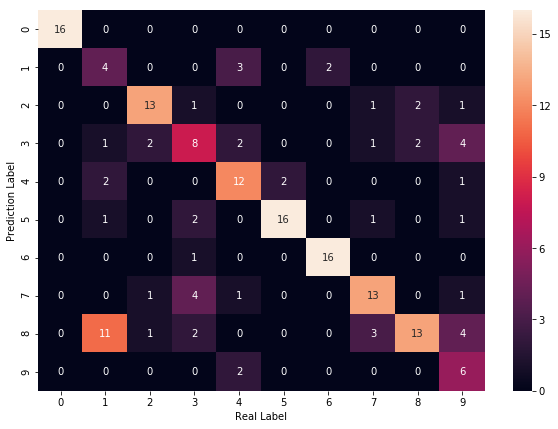

In [13]:
import seaborn as sn


df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.xlabel('Real Label')
plt.ylabel('Prediction Label')
plt.show()

In [14]:
list_P = []
for i,p_value in enumerate(pred_value):
    print("#{} min_error:{} index:{} real:{}".format(i, error_list[i], p_value[0], digits.target[1617+i]))

#0 min_error:1 index:[5] real:5
#1 min_error:1 index:[3] real:2
#2 min_error:1 index:[8] real:8
#3 min_error:0 index:[0] real:0
#4 min_error:2 index:[5] real:1
#5 min_error:2 index:[8] real:7
#6 min_error:0 index:[6] real:6
#7 min_error:2 index:[3 8] real:3
#8 min_error:1 index:[2] real:2
#9 min_error:3 index:[1 4 8] real:1
#10 min_error:3 index:[5 7] real:7
#11 min_error:2 index:[7] real:4
#12 min_error:0 index:[6] real:6
#13 min_error:1 index:[3] real:3
#14 min_error:3 index:[1 3 4 8] real:1
#15 min_error:1 index:[2] real:3
#16 min_error:2 index:[7] real:9
#17 min_error:2 index:[4 8] real:1
#18 min_error:2 index:[8] real:7
#19 min_error:1 index:[6] real:6
#20 min_error:1 index:[8] real:8
#21 min_error:0 index:[4] real:4
#22 min_error:2 index:[3 8] real:3
#23 min_error:3 index:[1 3 4 8] real:1
#24 min_error:1 index:[4] real:4
#25 min_error:2 index:[0] real:0
#26 min_error:0 index:[5] real:5
#27 min_error:1 index:[3] real:3
#28 min_error:2 index:[1 6] real:6
#29 min_error:1 index:[3] r

In [15]:
pred_value = []
error_list = []

for j in range(1617):
    pred = []
    for i in range(10):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(10 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )

list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
print("Testset acc:{}".format(np.sum(list_P == digits.target[:1617])/1617))
winner_fitness = []
for winner in winner_list:
    #print(winner.fitness)
    winner_fitness.append(winner.fitness)
print("Avg Base Learner:{}".format(np.mean(winner_fitness)))

Testset acc:0.7081014223871367
Avg Base Learner:0.8513296227581941


In [21]:
from random import randint

list_acc = []

for iii in range(11):
    pred_value = []
    error_list = []


    for j in range(1617,1617+180):
        pred = []
        for i in range(iii):
            [pred_outputs, real_outputs] = get_pred_real(i, j)
            #print(pred_outputs, real_outputs)
            pred.append(pred_outputs)
        #print(np.array(pred).T)

        error = []
        for i in range(10):
            error.append(iii - np.sum(number_codes[i][:iii] == np.array(pred).T))
        #print(error)

        pred_value.append(np.where(error==np.min(error)))
        error_list.append(np.min(error))
        #print(np.where(error==np.min(error)) )
    list_P = []
    for i in pred_value:
        if (len(i[0])) == 1:
            list_P.append(i[0][0])
        else:
            random_pick = randint(0, len(i[0])-1)
            list_P.append(i[0][random_pick])
    acc = np.sum(list_P == digits.target[1617:])/180
    print("Accuracy on training set: {}".format(acc))
    list_acc.append(acc)

Accuracy on training set: 0.1
Accuracy on training set: 0.16111111111111112
Accuracy on training set: 0.25
Accuracy on training set: 0.4222222222222222
Accuracy on training set: 0.46111111111111114
Accuracy on training set: 0.5388888888888889
Accuracy on training set: 0.5722222222222222
Accuracy on training set: 0.5888888888888889
Accuracy on training set: 0.5666666666666667
Accuracy on training set: 0.6
Accuracy on training set: 0.6444444444444445


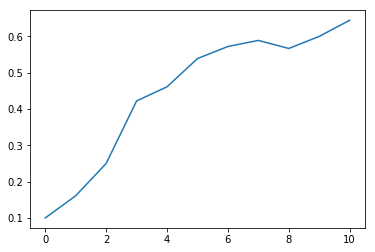

In [22]:
plt.plot(range(11),list_acc)
plt.show()

In [23]:
list_acc

[0.1,
 0.16111111111111112,
 0.25,
 0.4222222222222222,
 0.46111111111111114,
 0.5388888888888889,
 0.5722222222222222,
 0.5888888888888889,
 0.5666666666666667,
 0.6,
 0.6444444444444445]

In [20]:
number_codes

[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [1, 0, 0, 0, 0, 1, 1, 1, 1, 1],
 [0, 0, 1, 1, 1, 0, 1, 0, 1, 0],
 [1, 0, 1, 1, 1, 0, 0, 1, 1, 0],
 [0, 0, 1, 0, 1, 0, 1, 1, 0, 0],
 [0, 1, 1, 0, 0, 1, 1, 1, 0, 0],
 [0, 0, 0, 0, 1, 1, 0, 0, 1, 1],
 [1, 1, 0, 1, 0, 0, 1, 0, 1, 0],
 [0, 0, 1, 1, 0, 0, 1, 1, 1, 1],
 [0, 1, 1, 0, 1, 0, 0, 0, 1, 0]]